### Secret sharing works by splitting private information into smaller pieces

Imagine that you had one million dollars that you kept in a bank account, and in order to access this bank account you used to the password: secret.
You could split it up and distribute a letter each to six trusted shareholders.

# Threshold : minimum

polynomial interpolation
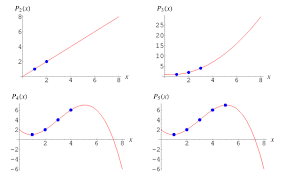

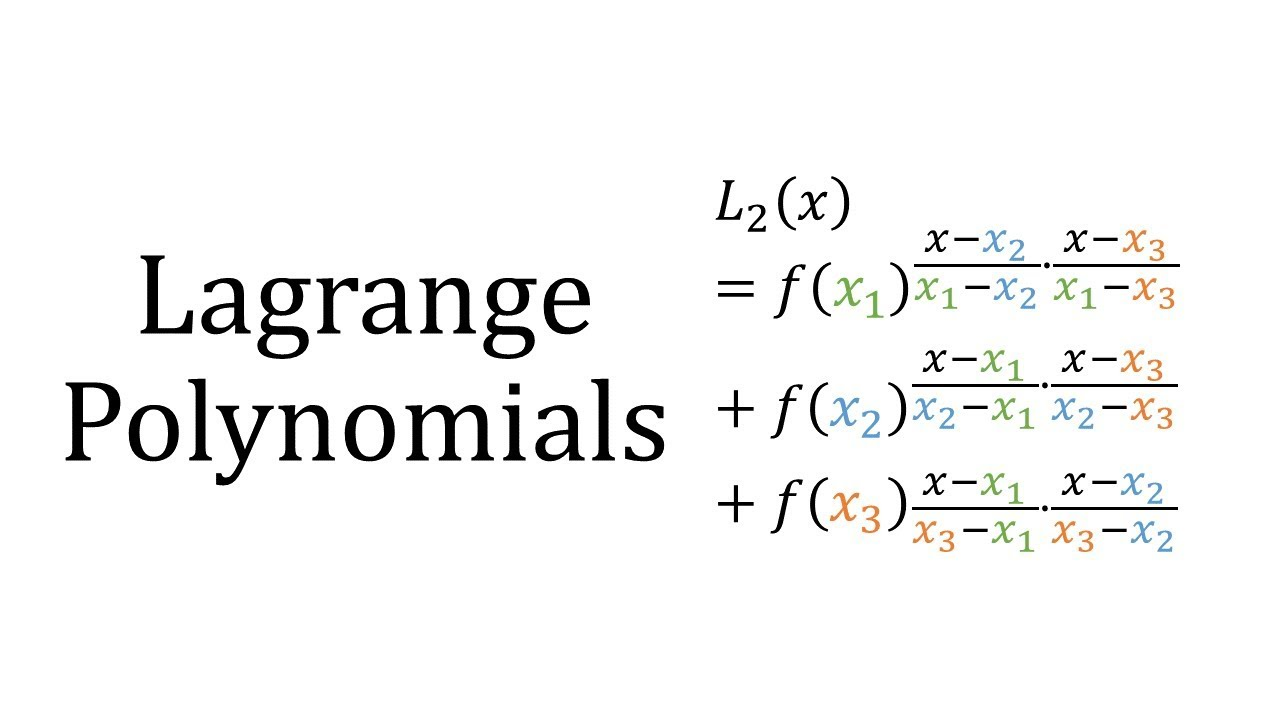![img](https://i.ytimg.com/vi/GtJKUIG9KXI/maxresdefault.jpg)
![img2](https://i.stack.imgur.com/tKeCq.png)
# $$
S = \text{Secret} \\
N = \{S1, S2, S3, ..., Sn\}
$$
- This is conventionally called (K, N) threshold scheme.
- Constant term is the secret code
- The remaining numbers are random
<center>
    <h1>
    S = 65, N = 4, K = 2. 
    </h1>
</center>
The main concept behind the Lagrange polynomial is to form the Lagrange’s identities first and the summation of these identities give us the required function which we need to find from the given points. 

## 1.  y = a + bx
## 2.  Let b be any random number, say b = 15.
## 3. y = 65 + 15x
## 4. Let those 4 points be (1, 80), (2, 95), (3, 110), (4, 125). 

![equ](https://media.geeksforgeeks.org/wp-content/uploads/20200415120713/math3.png)

# Modular multiplicative inverse
## Modular Arithmetric
![ma](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d14ffceac68514b13b3d2fd87b9febab0d27766)
#### m divides (evenly) the quantity ax − 1, or, put another way, the remainder after dividing ax by the integer m is 1
- inverse modulo m
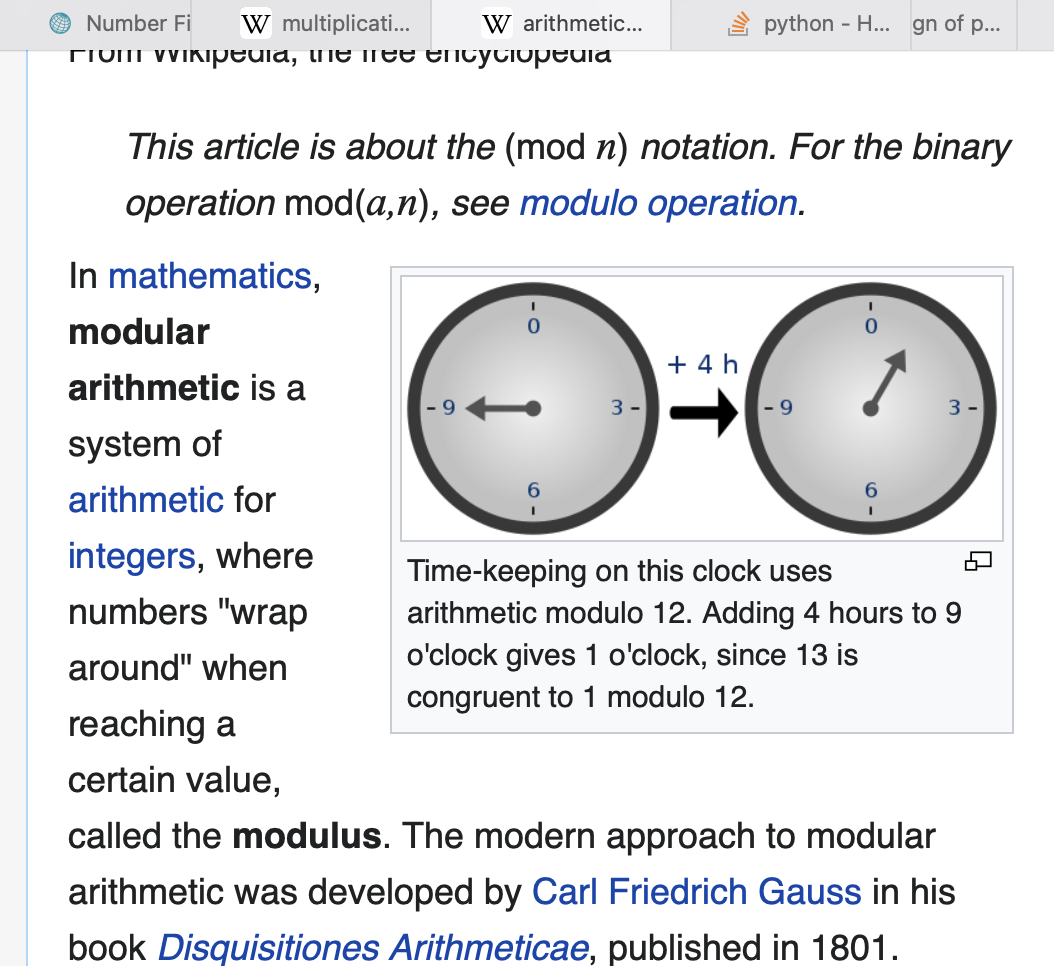

#### https://prog.world/save-the-password-a-fabulous-implementation-of-the-shamir-secret-sharing-scheme-in-python/

#### In a certain kingdom in a certain state the king lived. The king had a terrible secret:

In [99]:
def int_from_bytes(s):
    acc = 0
    for b in s:
        # print("b", b)
        acc *= 256
        acc += b
        # print("acc", acc)
        # print("---------")
    return acc

sct_msg = "terrible secret"
#sct_msg = "ช่วงชิง"
#sct_msg = 1234
#sct_msg = "1234"


In [100]:
sct_msg.encode("utf-8")

b'terrible secret'

In [101]:
secret = int_from_bytes(sct_msg.encode("utf-8"))
secret

604364026379228571900348070794257780

In [102]:
sct_msg[0]

't'

In [103]:
sct_msg.encode("utf-8")[0]

116

In [104]:
sct_msg.encode("ascii")[0]

116

he believed that three of them would not violate his will:

In [105]:
# from mod import Mod

In [106]:
from os import urandom

In [107]:
urandom(5)

b"\n\x8f'\x86\xac"

In [108]:
urandom(2)

b'\xdbJ'

First of all, he chose a large prime number – the 13th prime Mersenne (2 ** 521 – 1)

In [109]:
P = 2**521 - 1
P

6864797660130609714981900799081393217269435300143305409394463459185543183397656052122559640661454554977296311391480858037121987999716643812574028291115057151

He made sure that his terrible secret (in numerical terms) is less than P:



In [110]:
secret < P

True

And instead of a secret, I decided to use its comparison modulo P:



In [111]:
secret_moded = secret % P
secret_moded

604364026379228571900348070794257780

In [112]:
secret_moded < P

True

To allow the three sons to recreate the secret, the king had to generate two more parts, in order to subsequently mix them:

In [113]:
polynomial = [secret]
for _ in range(2):
    polynomial.append(int_from_bytes(urandom(16))% P)
polynomial

[604364026379228571900348070794257780,
 719617584444034214670050510697987725,
 35118432159926053746875600301971150506]

#### Then the king needed to evaluate the values ​​of the polynomial at random points - that is, calculate the polynomial[0] + polynomial[1]* x + polynomial[2]* x ** 2 ...
Although there are third-party modules for evaluating polynomials, they do not work with finite fields. Therefore, the king wrote the evaluation code manually:

In [114]:
def evaluate_y(coeffs, x):
    acc = 0
    power = 1
    for c in coeffs:
        acc += c * power
        power *= x
    return acc

Then the king rated the polynomial at five different points to give one piece to each son:



In [117]:
shards = {}
for _ in range(5):
    #x = int_from_bytes(urandom(16), P)
    #y = evaluate_y(polynomial, x)
    y = evaluate_y(polynomial, _)
    shards[_] = (_, y)

shards

{0: (0, 604364026379228571900348070794257780),
 1: (1, 36442413770749316533445998883463396011),
 2: (2, 142517327834971511988742850300074835254),
 3: (3, 318829106219045814937790902320628575509),
 4: (4, 565377748922972225380590154945124616776)}

And indeed, not all of his children turned out to be honest and truthful. Two of them, soon after his death, conspired and tried to collect a terrible secret from the parts that they had. Naturally, they did not succeed. However, when others found out about this, they expelled them from the kingdom forever:

In [118]:
del shards[2]
del shards[3]

In [119]:
shards

{0: (0, 604364026379228571900348070794257780),
 1: (1, 36442413770749316533445998883463396011),
 4: (4, 565377748922972225380590154945124616776)}

Twenty years later, as the king ordered, the older brother and two younger ones came together to find out the terrible secret of his father. To start, they combined their parts:

In [121]:
shards.values()

dict_values([(0, 604364026379228571900348070794257780), (1, 36442413770749316533445998883463396011), (4, 565377748922972225380590154945124616776)])

In [124]:
retrieved = list(shards.values())
retrieved

[(0, 604364026379228571900348070794257780),
 (1, 36442413770749316533445998883463396011),
 (4, 565377748922972225380590154945124616776)]

Secret recovery can be performed using the Lagrange interpolation polynomial. To do this, we estimate the polynomial at (0), and then at n other points (n is the degree of the polynomial). The polynomial formula can be written in explicit form. At zero, the polynomial is 1, at other points it is 0. Since the polynomial's estimate is a linear function, we can estimate and interpolate the estimates at the same points.

In [125]:
from functools import reduce
from operator import mul

In [145]:
# mul(3, 5).inverse() not found

In [ ]:
reduce()

In [146]:
def retrieve_original(encoded_secrets):
    x_s = [s[0] for s in encoded_secrets]
    print("X_s : ", x_s)
    acc = 0 % P
    print("len(encoded_sct) : ", len(encoded_secrets))
    print("---------------")
    for i in range(len(encoded_secrets)):
        others = list(x_s)
        print(f"others before pop : {others}")
        cur = others.pop(i)
        print(f"cur\t{cur}")
        print(f"others after pop : {others}")
        factor = 1 % P
        print("===============")
        for el in others:
            # WTF is .inverse()
            #factor *= el * (el - cur).inverse()
            # factor *= el * mul(el - cur).inverse()
        acc += factor * secret[i][1]
    return acc
retrieve_original(retrieved)

IndentationError: expected an indented block (2968914477.py, line 19)